In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
#TrainingData
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 122)


In [3]:
POS_CASH_balance=pd.read_csv('/Users/jayborkar/Downloads/all/POS_CASH_balance.csv')
bureau_balance=pd.read_csv('/Users/jayborkar/Downloads/all/bureau_balance.csv')
previous_application=pd.read_csv('/Users/jayborkar/Downloads/all/previous_application.csv')
installments_payments=pd.read_csv('/Users/jayborkar/Downloads/all/installments_payments.csv')
credit_card_balance=pd.read_csv('/Users/jayborkar/Downloads/all/credit_card_balance.csv')
bureau=pd.read_csv('/Users/jayborkar/Downloads/all/bureau.csv')

In [4]:
print('Size of application_train data', app_train.shape)
print('Size of bureau data', bureau.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)

Size of application_train data (307511, 122)
Size of bureau data (1716428, 17)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of POS_CASH_balance data (10001358, 8)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)


In [3]:
#TestingData
app_test = pd.read_csv('/Users/jayborkar/Downloads/all/application_test.csv')
print('Training data shape: ', app_test.shape)

Training data shape:  (48744, 121)


In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
 #Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_train = missing_values_table(app_train)
missing_values_train.head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [9]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='jayb1544', api_key='Tpumbrlqsk6FxdNrBgsJ')

In [8]:
temp = app_train["TARGET"].value_counts()
labels=['Yes','No']

trace = go.Pie(labels=labels, values=temp)
py.iplot([trace], filename='basic_pie_chart')

In [9]:
temp = app_train["NAME_INCOME_TYPE"].value_counts()
trace = go.Bar(
    x = temp.index,
    y = temp ,
)
data = [trace]
layout = go.Layout(
    title = "Income Type of Applicant ",
    xaxis=dict(
        title='Income Type',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

In [10]:
temp = app_train["OCCUPATION_TYPE"].value_counts()
trace = go.Bar(
    x = temp.index,
    y = temp ,
)
data = [trace]
layout = go.Layout(
    title = "Occupation Type of Applicant ",
    xaxis=dict(
        title='Occupation Type',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [11]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [12]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [13]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [14]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [15]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [16]:
#Anomalies
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [17]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

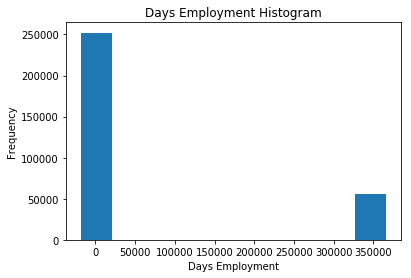

In [18]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [19]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


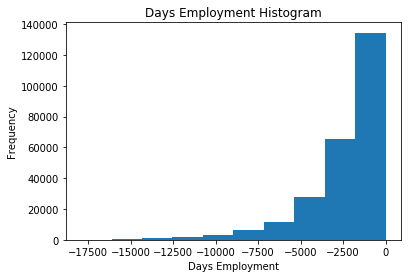

In [20]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [22]:
#Correlations
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

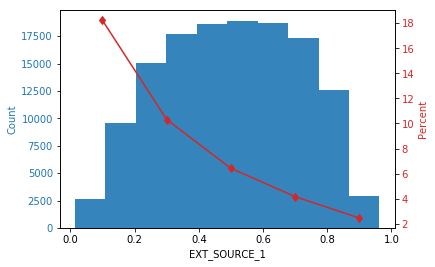

In [24]:
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'EXT_SOURCE_1']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100
perlist=[]
cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total,cnt5_Total=0,0,0,0,0
cnt1,cnt2,cnt3,cnt4,cnt5=0,0,0,0,0

for index, row in df.iterrows():
    if row['EXT_SOURCE_1']>=0.0 and row['EXT_SOURCE_1']<0.2:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['EXT_SOURCE_1']>=0.2 and row['EXT_SOURCE_1']<0.4:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['EXT_SOURCE_1']>=0.4 and row['EXT_SOURCE_1']<0.6:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['EXT_SOURCE_1']>=0.6 and row['EXT_SOURCE_1']<0.8:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1
    elif row['EXT_SOURCE_1']>=0.8 and row['EXT_SOURCE_1']<=1.0:
        cnt5_Total=cnt5_Total+1
        if row['TARGET']==1:
            cnt5=cnt5+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

per=percent(cnt5,cnt5_Total)
perlist.append(per)
          
data1 = app_train['EXT_SOURCE_1'] #['EXT_SOURCE_1']
data2 = pd.Series(perlist)
d=pd.Series([0.1,0.3,0.5,0.7,0.9])
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.set_xlabel('EXT_SOURCE_1')
ax1.set_ylabel('Count', color=color)
ax1.hist(data1.dropna(), alpha=0.9, color=color)
ax1.tick_params(axis='y', labelcolor=color)


color = 'tab:red'
ax2.set_ylabel('Percent', color=color)  # we already handled the x-label with ax1
ax2.plot(d,data2,color=color,marker='d')
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

In [25]:
app_train['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [16]:
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'EXT_SOURCE_1']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total,cnt5_Total=0,0,0,0,0
cnt1,cnt2,cnt3,cnt4,cnt5=0,0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['EXT_SOURCE_1']>=0.0 and row['EXT_SOURCE_1']<0.2:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['EXT_SOURCE_1']>=0.2 and row['EXT_SOURCE_1']<0.4:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['EXT_SOURCE_1']>=0.4 and row['EXT_SOURCE_1']<0.6:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['EXT_SOURCE_1']>=0.6 and row['EXT_SOURCE_1']<0.8:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1
    elif row['EXT_SOURCE_1']>=0.8 and row['EXT_SOURCE_1']<=1.0:
        cnt5_Total=cnt5_Total+1
        if row['TARGET']==1:
            cnt5=cnt5+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

per=percent(cnt5,cnt5_Total)
perlist.append(per)
d=pd.Series([0.1,0.3,0.5,0.7,0.9])

trace1 = go.Histogram(
    x= app_train['EXT_SOURCE_1'],
    #opacity=0.75,
    name='EXT_SOURCE_1'
)

trace2 = go.Scatter(
    x= d,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='count of EXT_SOURCE_1 Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='EXT_SOURCE_1'),
    yaxis=dict(
        title='Count'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [27]:
app_train['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [19]:
import statistics
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'EXT_SOURCE_2']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['EXT_SOURCE_2']>=8.173617e-08 and row['EXT_SOURCE_2']<3.924574e-01:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['EXT_SOURCE_2']>=3.924574e-01 and row['EXT_SOURCE_2']<5.659614e-01:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['EXT_SOURCE_2']>=5.659614e-01 and row['EXT_SOURCE_2']<6.636171e-01:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['EXT_SOURCE_2']>=6.636171e-01 and row['EXT_SOURCE_2']<=8.549997e-01:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=a,b,c,d=(statistics.median([8.173617e-08,3.924574e-01])),(statistics.median([3.924574e-01,5.659614e-01])),(statistics.median([5.659614e-01,6.636171e-01])),(statistics.median([6.636171e-01,8.549997e-01]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= app_train['EXT_SOURCE_2'],
    #opacity=0.75,
    name='EXT_SOURCE_2'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='count of EXT_SOURCE_2 Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='EXT_SOURCE_2'),
    yaxis=dict(
        title='Count'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [30]:
app_train['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [18]:
app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'EXT_SOURCE_3']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['EXT_SOURCE_3']>=0.000527 and row['EXT_SOURCE_3']<0.370650:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['EXT_SOURCE_3']>=0.370650 and row['EXT_SOURCE_3']<0.535276:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['EXT_SOURCE_3']>=0.535276 and row['EXT_SOURCE_3']<0.669057:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['EXT_SOURCE_3']>=0.669057 and row['EXT_SOURCE_3']<=0.896010:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=a,b,c,d=(statistics.median([0.000527,0.370650])),(statistics.median([0.370650,0.535276])),(statistics.median([0.535276,0.669057])),(statistics.median([0.669057,0.896010]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= app_train['EXT_SOURCE_3'],
    #opacity=0.75,
    name='EXT_SOURCE_3'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='count of EXT_SOURCE_3 Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='EXT_SOURCE_3'),
    yaxis=dict(
        title='Count'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [32]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
import statistics

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'AMT_INCOME_TOTAL']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['AMT_INCOME_TOTAL']>=25650.0 and row['AMT_INCOME_TOTAL']<112500.0:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['AMT_INCOME_TOTAL']>=112500.0 and row['AMT_INCOME_TOTAL']<147150.0:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['AMT_INCOME_TOTAL']>=147150.0 and row['AMT_INCOME_TOTAL']<202500.0:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['AMT_INCOME_TOTAL']>=202500.0 and row['AMT_INCOME_TOTAL']<=117000000.0:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([25650.0,112500])),(statistics.median([112500,147150])),(statistics.median([147150,202500])),(statistics.median([202500,11700000]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= app_train['AMT_INCOME_TOTAL'],
    #opacity=0.75,
    name='AMT_INCOME_TOTAL'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='AMT_INCOME_TOTAL',
    yaxis=dict(
        title='AMT_INCOME_TOTAL'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')



/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [34]:
app_train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [35]:
import statistics

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'AMT_CREDIT']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['AMT_CREDIT']>=45000.0 and row['AMT_CREDIT']<270000.0:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['AMT_CREDIT']>=270000.0 and row['AMT_CREDIT']<513531.0:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['AMT_CREDIT']>=513531.0 and row['AMT_CREDIT']<808650.0:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['AMT_CREDIT']>=808650.0 and row['AMT_CREDIT']<=4050000.0:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([45000,270000])),(statistics.median([270000,513531])),(statistics.median([513531,808650])),(statistics.median([808650,4050000]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= app_train['AMT_CREDIT'],
    #opacity=0.75,
    name='AMT_CREDIT'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='AMT_CREDIT',
    yaxis=dict(
        title='AMT_CREDIT'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')


/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [36]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [37]:
import statistics

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'AMT_ANNUITY']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['AMT_ANNUITY']>=1615.5 and row['AMT_ANNUITY']<16524.0:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['AMT_ANNUITY']>=16524.0 and row['AMT_ANNUITY']<24903.0:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['AMT_ANNUITY']>=24903.0 and row['AMT_ANNUITY']<34596.0:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['AMT_ANNUITY']>=34596.0 and row['AMT_ANNUITY']<=258025.5:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([1615.5,16524.0])),(statistics.median([16524.0,24903.0])),(statistics.median([24903.0,34596.0])),(statistics.median([34596.0,258025.5]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= app_train['AMT_ANNUITY'],
    #opacity=0.75,
    name='AMT_ANNUITY'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='AMT_ANNUITY',
    yaxis=dict(
        title='AMT_ANNUITY'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-doub')


/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [31]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['NAME_INCOME_TYPE','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )
trace1 = go.Bar(
    x = c.index,
    y = c['sum'] ,
    name='NAME_INCOME_TYPE'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='NAME_INCOME_TYPE Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='NAME_INCOME_TYPE'
    ),
    yaxis=dict(
        title='COUNT'
    ),
    yaxis2=dict(
        title='PERCENT OF TARGET=1',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['OCCUPATION_TYPE','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )

trace1 = go.Bar(
    x= c.index,
    y = c['sum'] ,
    name='OCCUPATION_TYPE'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Count of OCCUPATION_TYPE Vs PERCENT OF TARGET=1',
     xaxis=dict(
        title='OCCUPATION_TYPE'
    ),
    yaxis=dict(
        title='COUNT'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-double')


In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['FLAG_OWN_CAR','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )

trace1 = go.Bar(
    x= c.index,
    y = c['sum'] ,
    name='FLAG_OWN_CAR'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='count of FLAG_OWN_CAR Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='FLAG_OWN_CAR'
    ),
    yaxis=dict(
        title='COUNT'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple')

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['FLAG_OWN_REALTY','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )

trace1 = go.Bar(
    x= c.index,
    y = c['sum'] ,
    name='FLAG_OWN_REALTY'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='count of FLAG_OWN_REALTY Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='FLAG_OWN_REALTY'
    ),
    yaxis=dict(
        title='COUNT'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple')

In [42]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['NAME_EDUCATION_TYPE','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )
trace1 = go.Bar(
    x = c.index,
    y = c['sum'] ,
    name='NAME_EDUCATION_TYPE'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='NAME_EDUCATION_TYPE',
    yaxis=dict(
        title='NAME_EDUCATION_TYPE'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multipleM')

In [43]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['NAME_HOUSING_TYPE','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )
trace1 = go.Bar(
    x = c.index,
    y = c['sum'] ,
    name='NAME_HOUSING_TYPE'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='NAME_HOUSING_TYPE',
    yaxis=dict(
        title='NAME_HOUSING_TYPE'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multipleM')

In [44]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [21]:
import statistics

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'DAYS_BIRTH']]
df=df.dropna()
df['DAYS_BIRTH']=df['DAYS_BIRTH']/-365

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['DAYS_BIRTH']>=20.517808 and row['DAYS_BIRTH']<34.008219:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['DAYS_BIRTH']>=34.008219 and row['DAYS_BIRTH']<43.150685:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['DAYS_BIRTH']>=43.150685 and row['DAYS_BIRTH']<53.923288:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['DAYS_BIRTH']>=53.923288 and row['DAYS_BIRTH']<=69.120548:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([20.517808,34.008219])),(statistics.median([34.008219,43.150685])),(statistics.median([43.150685,53.923288])),(statistics.median([53.923288,69.120548]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= df['DAYS_BIRTH'],
    #opacity=0.75,
    name='DAYS_BIRTH'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='count of DAYS_BIRTH Vs PERCENT OF TARGET=1',
    xaxis=dict(
        title='DAYS_BIRTH'),
    yaxis=dict(
        title='Count'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-doub')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [46]:
app_train['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [47]:
import statistics

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'OWN_CAR_AGE']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['OWN_CAR_AGE']>=0.0 and row['OWN_CAR_AGE']<5.0:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['OWN_CAR_AGE']>=5.0 and row['OWN_CAR_AGE']<9.0:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['OWN_CAR_AGE']>=9.0 and row['OWN_CAR_AGE']<15.0:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['OWN_CAR_AGE']>=15.0 and row['OWN_CAR_AGE']<=91.0:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([0,5])),(statistics.median([5,9])),(statistics.median([9,15])),(statistics.median([15,91]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= df['OWN_CAR_AGE'],
    #opacity=0.75,
    name='OWN_CAR_AGE'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='OWN_CAR_AGE',
    yaxis=dict(
        title='OWN_CAR_AGE'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-doub')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



In [48]:
import plotly.plotly as py
import plotly.graph_objs as go

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')

def per(source):
    return (source[1]/source['sum'])*100

group_by_source = app_train.groupby(['ORGANIZATION_TYPE','TARGET'])
group_by_source.size()
c= group_by_source.size().unstack()
c=c.fillna(0)

c['sum']=c[0] + c[1]
c['percent'] = c.apply(per,axis=1)
c= c.sort_values('sum',ascending=False )

trace1 = go.Bar(
    x= c.index,
    y = c['sum'] ,
    name='ORGANIZATION_TYPE'
)

trace2 = go.Scatter(
    x= c.index,
    y= c['percent'],
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='ORGANIZATION_TYPE',
    yaxis=dict(
        title='ORGANIZATION_TYPE'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple')

In [49]:
(app_train['DAYS_EMPLOYED']/-365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [55]:
temp = app_train["DAYS_EMPLOYED"]
trace = go.Bar(
    x = temp.index,
    y = temp ,
)
data = [trace]
layout = go.Layout(
    title = "DAYS_EMPLOYED ",
    xaxis=dict(
        title='DAYS_EMPLOYED',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [56]:
import statistics

app_train = pd.read_csv('/Users/jayborkar/Downloads/all/application_train.csv')
df= app_train[['TARGET', 'DAYS_EMPLOYED']]
df=app_train['DAYS_EMPLOYED'].replace({365243: np.nan})
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED']/-365
df=df.dropna()


def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['DAYS_EMPLOYED']<=0.0:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['DAYS_EMPLOYED']>0.0 and row['DAYS_EMPLOYED']<3.323288:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['DAYS_EMPLOYED']>=3.323288 and row['DAYS_EMPLOYED']<7.561644:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['DAYS_EMPLOYED']>=7.561644 and row['DAYS_EMPLOYED']<=49.073973:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([-1000,0])),(statistics.median([0,3.32328])),(statistics.median([3.32328,7.561644])),(statistics.median([7.561644,49.073973]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= df['DAYS_EMPLOYED'],
    #opacity=0.75,
    name='OWN_CAR_AGE'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='DAYS_EMPLOYED',
    yaxis=dict(
        title='DAYS_EMPLOYED'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-doub')

KeyError: 'DAYS_EMPLOYED'

In [ ]:
bureau_balance=pd.read_csv('/Users/jayborkar/Downloads/all/bureau_balance.csv')
(bureau_balance['MONTHS_BALANCE']).describe()

In [ ]:
import statistics

bureau_balance=pd.read_csv('/Users/jayborkar/Downloads/all/bureau_balance.csv')
df= app_train[['TARGET', 'OWN_CAR_AGE']]
df=df.dropna()

def percent(val,total):
    return (val/total)*100

cnt1_Total,cnt2_Total,cnt3_Total,cnt4_Total=0,0,0,0
cnt1,cnt2,cnt3,cnt4=0,0,0,0
perlist=[]

for index, row in df.iterrows():
    if row['MONTHS_BALANCE']>=-9.600000e+01 and row['MONTHS_BALANCE']<-4.600000e+01:
        cnt1_Total=cnt1_Total+1
        if row['TARGET']==1:
            cnt1=cnt1+1
    elif row['MONTHS_BALANCE']>=-4.600000e+01 and row['MONTHS_BALANCE']<-2.500000e+01:
        cnt2_Total=cnt2_Total+1
        if row['TARGET']==1:
            cnt2=cnt2+1
    elif row['MONTHS_BALANCE']>=-2.500000e+01 and row['MONTHS_BALANCE']<-1.100000e+01:
        cnt3_Total=cnt3_Total+1
        if row['TARGET']==1:
            cnt3=cnt3+1
    elif row['MONTHS_BALANCE']>=-1.100000e+01 and row['MONTHS_BALANCE']<=0.000000e+00:
        cnt4_Total=cnt4_Total+1
        if row['TARGET']==1:
            cnt4=cnt4+1

per=percent(cnt1,cnt1_Total)
perlist.append(per)

per=percent(cnt2,cnt2_Total)
perlist.append(per)

per=percent(cnt3,cnt3_Total)
perlist.append(per)

per=percent(cnt4,cnt4_Total)
perlist.append(per)

a,b,c,d=(statistics.median([0,5])),(statistics.median([5,9])),(statistics.median([9,15])),(statistics.median([15,91]))
d2=pd.Series([a,b,c,d])

trace1 = go.Histogram(
    x= bureau_balance['MONTHS_BALANCE'],
    #opacity=0.75,
    name='OWN_CAR_AGE'
)

trace2 = go.Scatter(
    x= d2,
    y= pd.Series(perlist),
    name='PERCENT OF TARGET=1',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='OWN_CAR_AGE',
    yaxis=dict(
        title='OWN_CAR_AGE'
    ),
    yaxis2=dict(
        title='PERCENT',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='multiple-axes-doub')